# data to hist

In [5]:
import matplotlib.pyplot as plt

In [7]:
# set parameters
# num of trials
num=100000
n_samples=2
# num of recombinations per base per gen
pi=1e-7
# pi = 1e-7/gen/base
s_len=5000
# R = 1e-3/gen
pop_size=20000
# \pi LN = 10/gen (~1/gen)

In [3]:
# import the data
with open("sim_data.txt", 'r') as txtfile:
    t_mrca_list_text=txtfile.read();
start=1;
t_mrca_list=[];
for idx in range(num):
    if idx<num-1:
        end=t_mrca_list_text.index(", ");
        t_mrca_list.append(float(t_mrca_list_text[start:end]))
        t_mrca_list_text=t_mrca_list_text[end+1:len(t_mrca_list_text)];
    else:
        t_mrca_list.append(float(t_mrca_list_text[start:len(t_mrca_list_text)-1]))

In [4]:
# measure in new time
t_mrca_list_rn = [t_mrca_list[idx]/pop_size for idx in range(num)]

Text(0.5, 0, 'Fastest Coalescent Time (generations)')

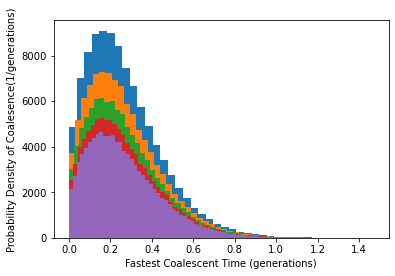

In [5]:
# find the best number of bins (wrt num)
plt.hist(t_mrca_list_rn, density=False, bins=40,range=(0,max(t_mrca_list_rn)))
plt.hist(t_mrca_list_rn, density=False, bins=50,range=(0,max(t_mrca_list_rn)))
plt.hist(t_mrca_list_rn, density=False, bins=60,range=(0,max(t_mrca_list_rn)))
plt.hist(t_mrca_list_rn, density=False, bins=70,range=(0,max(t_mrca_list_rn)))
plt.hist(t_mrca_list_rn, density=False, bins=80,range=(0,max(t_mrca_list_rn)))
plt.ylabel("Probability Density of Coalesence(1/generations)")
plt.xlabel("Fastest Coalescent Time (generations)")

In [6]:
# time list to histogram
def data2hist(data,n_bins):
    step_size = max(data)/n_bins
    time = [(idx+0.5)*step_size for idx in range(n_bins)]
    hist = [0 for idx in range(n_bins)]
    for idx in range(len(data)):
        bin_idx = int(data[idx]/step_size)
        if bin_idx == n_bins:
            bin_idx = bin_idx-1
        else:
            bin_idx = bin_idx
        hist[bin_idx] = hist[bin_idx]+1/len(data)/step_size
    return [time,hist]

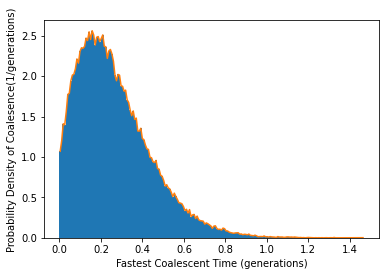

In [7]:
# convert data and see if it is reasonable
n_bins_used = 200 # 50
histdata = data2hist(t_mrca_list_rn,n_bins_used)
plt.hist(t_mrca_list_rn, density=True, bins=n_bins_used,range=(0,max(t_mrca_list_rn)))
plt.ylabel("Probability Density of Coalesence(1/generations)")
plt.xlabel("Fastest Coalescent Time (generations)")
plt.plot(histdata[0],histdata[1])

In [8]:
# save the data
with open("sim_hist.txt", 'w') as txtfile:
    txtfile.write(str(histdata))

# NonlinearModelFit in Mathematica

# run some random simulations and see if the fit is good

In [1]:
import msprime
import matplotlib.pyplot as plt
from sympy import exp
import random

In [2]:
# define the function that finds the least coalescent time
def t_mrca_api(tree_s):
    t_ca_list = []
    for tree in tree_s.trees():
        t_ca_list.append(tree_s.tables.nodes[tree.root].time)
    return(min(t_ca_list))

In [3]:
# the fitted factors
alpha = 0.731512
beta = 1.28224

In [4]:
# set number of trials for verification and constant sample size
num_v=int(3e3)
n_samples=2

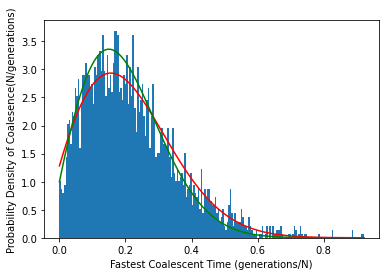

In [16]:
# set parameters for verification
# num of recombinations per base per gen
pi_v=random.uniform(0, 1)*2e-7
s_len_v=int(random.uniform(0, 1)*5e3)
pop_size_v=int(random.uniform(0, 1)*5e4)
com_para_v=2*pi_v*s_len_v*pop_size_v
# run the simulation with renormalized time
t_mrca_list_v = []
for idxx in range(num_v):
    tree_s_sim = msprime.sim_ancestry(
        samples=n_samples/2,
        recombination_rate=pi_v,
        sequence_length=s_len_v,
        population_size=pop_size_v/2,
        record_full_arg=True)
    # t_mrca_list.append(t_mrca_text(tree_s_sim.draw_text()))
    t_mrca_list_v.append(t_mrca_api(tree_s_sim)/pop_size_v)
xnum=[idx*max(t_mrca_list_v)/num_v for idx in range(num_v+1)]
y1num=[(alpha*com_para_v*(idx*max(t_mrca_list_v)/num_v)+beta)*exp(-alpha*com_para_v*(idx*max(t_mrca_list_v)/num_v)**2/2-beta*(idx*max(t_mrca_list_v)/num_v)) for idx in range(num_v+1)]
y2num=[(com_para_v*(idx*max(t_mrca_list_v)/num_v)+1)*exp(-com_para_v*(idx*max(t_mrca_list_v)/num_v)**2/2-(idx*max(t_mrca_list_v)/num_v)) for idx in range(num_v+1)]
# overlay plot
plt.hist(t_mrca_list_v, density=True, bins=200,range=(0,max(t_mrca_list_v)))
plt.ylabel("Probability Density of Coalesence(N/generations)")
plt.xlabel("Fastest Coalescent Time (generations/N)")
plt.plot(xnum,y1num,"r")
plt.plot(xnum,y2num,"g")

# big S

48.0


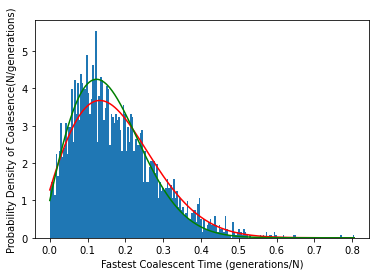

In [5]:
# set parameters for verification
# num of recombinations per base per gen
pi_v=4e-8
s_len_v=int(1e4)
pop_size_v=int(6e4)
com_para_v=2*pi_v*s_len_v*pop_size_v
print(com_para_v)
# run the simulation with renormalized time
t_mrca_list_v = []
for idxx in range(num_v):
    tree_s_sim = msprime.sim_ancestry(
        samples=n_samples/2,
        recombination_rate=pi_v,
        sequence_length=s_len_v,
        population_size=pop_size_v/2,
        record_full_arg=True)
    # t_mrca_list.append(t_mrca_text(tree_s_sim.draw_text()))
    t_mrca_list_v.append(t_mrca_api(tree_s_sim)/pop_size_v)
xnum=[idx*max(t_mrca_list_v)/num_v for idx in range(num_v+1)]
y1num=[(alpha*com_para_v*(idx*max(t_mrca_list_v)/num_v)+beta)*exp(-alpha*com_para_v*(idx*max(t_mrca_list_v)/num_v)**2/2-beta*(idx*max(t_mrca_list_v)/num_v)) for idx in range(num_v+1)]
y2num=[(com_para_v*(idx*max(t_mrca_list_v)/num_v)+1)*exp(-com_para_v*(idx*max(t_mrca_list_v)/num_v)**2/2-(idx*max(t_mrca_list_v)/num_v)) for idx in range(num_v+1)]
# overlay plot
plt.hist(t_mrca_list_v, density=True, bins=200,range=(0,max(t_mrca_list_v)))
plt.ylabel("Probability Density of Coalesence(N/generations)")
plt.xlabel("Fastest Coalescent Time (generations/N)")
plt.plot(xnum,y1num,"r")
plt.plot(xnum,y2num,"g")

# medium S

5.0


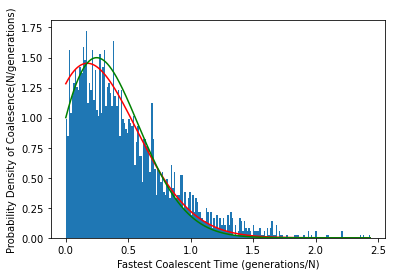

In [7]:
# set parameters for verification
# num of recombinations per base per gen
pi_v=1e-8
s_len_v=int(5e3)
pop_size_v=int(5e4)
com_para_v=2*pi_v*s_len_v*pop_size_v
print(com_para_v)
# run the simulation with renormalized time
t_mrca_list_v = []
for idxx in range(num_v):
    tree_s_sim = msprime.sim_ancestry(
        samples=n_samples/2,
        recombination_rate=pi_v,
        sequence_length=s_len_v,
        population_size=pop_size_v/2,
        record_full_arg=True)
    # t_mrca_list.append(t_mrca_text(tree_s_sim.draw_text()))
    t_mrca_list_v.append(t_mrca_api(tree_s_sim)/pop_size_v)
xnum=[idx*max(t_mrca_list_v)/num_v for idx in range(num_v+1)]
y1num=[(alpha*com_para_v*(idx*max(t_mrca_list_v)/num_v)+beta)*exp(-alpha*com_para_v*(idx*max(t_mrca_list_v)/num_v)**2/2-beta*(idx*max(t_mrca_list_v)/num_v)) for idx in range(num_v+1)]
y2num=[(com_para_v*(idx*max(t_mrca_list_v)/num_v)+1)*exp(-com_para_v*(idx*max(t_mrca_list_v)/num_v)**2/2-(idx*max(t_mrca_list_v)/num_v)) for idx in range(num_v+1)]
# overlay plot
plt.hist(t_mrca_list_v, density=True, bins=200,range=(0,max(t_mrca_list_v)))
plt.ylabel("Probability Density of Coalesence(N/generations)")
plt.xlabel("Fastest Coalescent Time (generations/N)")
plt.plot(xnum,y1num,"r")
plt.plot(xnum,y2num,"g")

# small S

0.020000000000000004


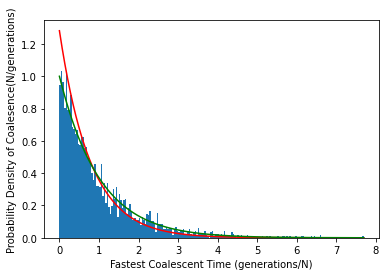

In [8]:
# set parameters for verification
# num of recombinations per base per gen
pi_v=1e-9
s_len_v=int(1e3)
pop_size_v=int(1e4)
com_para_v=2*pi_v*s_len_v*pop_size_v
print(com_para_v)
# run the simulation with renormalized time
t_mrca_list_v = []
for idxx in range(num_v):
    tree_s_sim = msprime.sim_ancestry(
        samples=n_samples/2,
        recombination_rate=pi_v,
        sequence_length=s_len_v,
        population_size=pop_size_v/2,
        record_full_arg=True)
    # t_mrca_list.append(t_mrca_text(tree_s_sim.draw_text()))
    t_mrca_list_v.append(t_mrca_api(tree_s_sim)/pop_size_v)
xnum=[idx*max(t_mrca_list_v)/num_v for idx in range(num_v+1)]
y1num=[(alpha*com_para_v*(idx*max(t_mrca_list_v)/num_v)+beta)*exp(-alpha*com_para_v*(idx*max(t_mrca_list_v)/num_v)**2/2-beta*(idx*max(t_mrca_list_v)/num_v)) for idx in range(num_v+1)]
y2num=[(com_para_v*(idx*max(t_mrca_list_v)/num_v)+1)*exp(-com_para_v*(idx*max(t_mrca_list_v)/num_v)**2/2-(idx*max(t_mrca_list_v)/num_v)) for idx in range(num_v+1)]
# overlay plot
plt.hist(t_mrca_list_v, density=True, bins=200,range=(0,max(t_mrca_list_v)))
plt.ylabel("Probability Density of Coalesence(N/generations)")
plt.xlabel("Fastest Coalescent Time (generations/N)")
plt.plot(xnum,y1num,"r")
plt.plot(xnum,y2num,"g")